In [42]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

In [43]:
learning_rate = 0.1
display_step = 50
epochs = 1000

In [44]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [45]:
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

(55000, 784)
(55000, 10)


In [46]:
# Load data
#data = np.load('data_with_labels.npz')
train = mnist.train.images
labels = mnist.train.labels

In [47]:
# Look at some data
print(train.shape)
print(labels.shape)

(55000, 784)
(55000, 10)


In [48]:
#train.reshape([-1,1296]).shape

Label [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


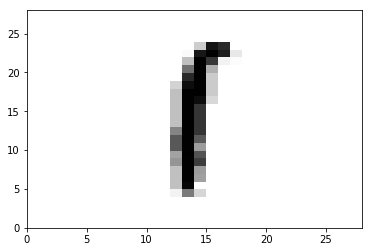

In [49]:
# cell between 0, 54999
cell = 20
pcolor(mnist.train.images[cell].reshape(28,28), cmap=plt.cm.gray_r)
print ("Label", mnist.train.labels[cell])

In [50]:
# Split data into training and validation
indices = np.random.permutation(train.shape[0])
print (indices)
valid_cnt = int(train.shape[0] * 0.1)
print (valid_cnt)

[16341 30233 46289 ..., 49074  6884 49183]
5500


In [51]:
test_idx, training_idx = indices[:valid_cnt], indices[valid_cnt:]
test, train = train[test_idx,:], train[training_idx,:]
onehot_test, onehot_train = labels[test_idx,:], labels[training_idx,:]

In [52]:
# These will be inputs
## Input pixels, flattened
x = tf.placeholder("float", [None, 784])
## Known labels
y_ = tf.placeholder("float", [None,10])

# Variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
# Define model
y = tf.nn.softmax(tf.matmul(x,W) + b)

# Climb on cross-entropy

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_step = optimizer.minimize(cross_entropy)

# Just initialize
init = tf.global_variables_initializer()

In [53]:
sess = tf.Session()
sess.run(init) # reset values to wrong
# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Actually train
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in range(epochs):
    # Record summary data, and the accuracy
    print ("epoch=", i, " ", sess.run([train_step,cross_entropy] , {x: train.reshape([-1,784]), y_: onehot_train}))
    sess.run([train_step,cross_entropy] , {x: train.reshape([-1,784]), y_: onehot_train})

    if i % 10 == 0:
        # Check accuracy on train set
        A = sess.run (accuracy, {x: train.reshape([-1,784]),y_: onehot_train})
        #print (A)
        train_acc[i//10] = A
        # And now the validation set
        A = sess.run (accuracy, {x: test.reshape([-1,784]), y_: onehot_test})
        #print (A)
        test_acc[i//10] = A
curr_W, curr_b, curr_cross_entropy = sess.run([W, b, cross_entropy], {x: train.reshape([-1,784]), y_: onehot_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_cross_entropy))

epoch= 0   [None, 2.3027074]
epoch= 1   [None, 2.101234]
epoch= 2   [None, 1.9301376]
epoch= 3   [None, 1.7829655]
epoch= 4   [None, 1.6564628]
epoch= 5   [None, 1.547734]
epoch= 6   [None, 1.4540834]
epoch= 7   [None, 1.3731273]
epoch= 8   [None, 1.3027917]
epoch= 9   [None, 1.2413491]
epoch= 10   [None, 1.1873525]
epoch= 11   [None, 1.1396234]
epoch= 12   [None, 1.0971829]
epoch= 13   [None, 1.0592356]
epoch= 14   [None, 1.0251241]
epoch= 15   [None, 0.99430823]
epoch= 16   [None, 0.96633887]
epoch= 17   [None, 0.94083679]
epoch= 18   [None, 0.91749424]
epoch= 19   [None, 0.89604342]
epoch= 20   [None, 0.87626278]
epoch= 21   [None, 0.85795915]
epoch= 22   [None, 0.84097522]
epoch= 23   [None, 0.82516414]
epoch= 24   [None, 0.81040847]
epoch= 25   [None, 0.7966032]
epoch= 26   [None, 0.78365374]
epoch= 27   [None, 0.77148366]
epoch= 28   [None, 0.76002115]
epoch= 29   [None, 0.74920225]
epoch= 30   [None, 0.73897445]
epoch= 31   [None, 0.72928536]
epoch= 32   [None, 0.72009611]
epoch

epoch= 261   [None, 0.38954794]
epoch= 262   [None, 0.38924879]
epoch= 263   [None, 0.38895226]
epoch= 264   [None, 0.38865766]
epoch= 265   [None, 0.38836321]
epoch= 266   [None, 0.38807228]
epoch= 267   [None, 0.38778219]
epoch= 268   [None, 0.38749424]
epoch= 269   [None, 0.38720748]
epoch= 270   [None, 0.38692188]
epoch= 271   [None, 0.38663787]
epoch= 272   [None, 0.38635576]
epoch= 273   [None, 0.38607514]
epoch= 274   [None, 0.3857975]
epoch= 275   [None, 0.38551927]
epoch= 276   [None, 0.38524425]
epoch= 277   [None, 0.38497001]
epoch= 278   [None, 0.38469756]
epoch= 279   [None, 0.38442644]
epoch= 280   [None, 0.38415697]
epoch= 281   [None, 0.38388848]
epoch= 282   [None, 0.38362181]
epoch= 283   [None, 0.3833566]
epoch= 284   [None, 0.38309225]
epoch= 285   [None, 0.3828305]
epoch= 286   [None, 0.38256973]
epoch= 287   [None, 0.38231012]
epoch= 288   [None, 0.38205177]
epoch= 289   [None, 0.38179514]
epoch= 290   [None, 0.38153937]
epoch= 291   [None, 0.38128519]
epoch= 292 

epoch= 519   [None, 0.34431183]
epoch= 520   [None, 0.34420589]
epoch= 521   [None, 0.34409982]
epoch= 522   [None, 0.34399399]
epoch= 523   [None, 0.34388873]
epoch= 524   [None, 0.34378409]
epoch= 525   [None, 0.34367877]
epoch= 526   [None, 0.34357449]
epoch= 527   [None, 0.34346974]
epoch= 528   [None, 0.34336618]
epoch= 529   [None, 0.34326234]
epoch= 530   [None, 0.34315953]
epoch= 531   [None, 0.34305614]
epoch= 532   [None, 0.34295344]
epoch= 533   [None, 0.3428514]
epoch= 534   [None, 0.34274834]
epoch= 535   [None, 0.34264717]
epoch= 536   [None, 0.34254509]
epoch= 537   [None, 0.34244397]
epoch= 538   [None, 0.34234241]
epoch= 539   [None, 0.34224218]
epoch= 540   [None, 0.34214094]
epoch= 541   [None, 0.34204105]
epoch= 542   [None, 0.34194097]
epoch= 543   [None, 0.34184131]
epoch= 544   [None, 0.34174171]
epoch= 545   [None, 0.34164217]
epoch= 546   [None, 0.34154388]
epoch= 547   [None, 0.34144521]
epoch= 548   [None, 0.34134722]
epoch= 549   [None, 0.34124875]
epoch= 55

epoch= 776   [None, 0.32405308]
epoch= 777   [None, 0.32399368]
epoch= 778   [None, 0.32393479]
epoch= 779   [None, 0.32387665]
epoch= 780   [None, 0.3238174]
epoch= 781   [None, 0.3237586]
epoch= 782   [None, 0.32370028]
epoch= 783   [None, 0.32364208]
epoch= 784   [None, 0.32358348]
epoch= 785   [None, 0.32352537]
epoch= 786   [None, 0.32346785]
epoch= 787   [None, 0.32340959]
epoch= 788   [None, 0.32335183]
epoch= 789   [None, 0.32329407]
epoch= 790   [None, 0.32323623]
epoch= 791   [None, 0.32317865]
epoch= 792   [None, 0.32312164]
epoch= 793   [None, 0.32306412]
epoch= 794   [None, 0.32300684]
epoch= 795   [None, 0.32294986]
epoch= 796   [None, 0.32289287]
epoch= 797   [None, 0.32283559]
epoch= 798   [None, 0.32277867]
epoch= 799   [None, 0.32272217]
epoch= 800   [None, 0.32266545]
epoch= 801   [None, 0.32260931]
epoch= 802   [None, 0.32255271]
epoch= 803   [None, 0.32249632]
epoch= 804   [None, 0.32244074]
epoch= 805   [None, 0.32238439]
epoch= 806   [None, 0.32232872]
epoch= 807

In [54]:
# Notice that accuracy flattens out
print(train_acc[-1])
print(test_acc[-1])

0.913050532341
0.905090928078


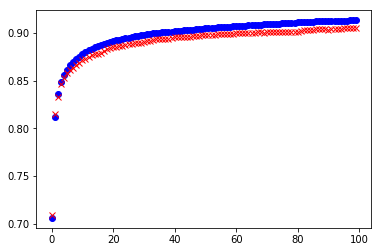

In [55]:
# Plot the accuracy curves
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

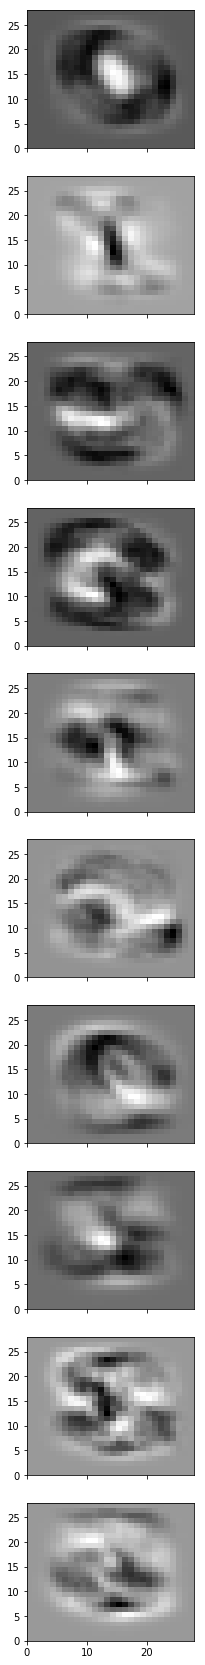

In [56]:
# Look at a subplot of the weights for each font
f, plts = plt.subplots(10, sharex=True, figsize=(3,30))

for i in range(10):
    plts[i].pcolor(curr_W[:,i].reshape([28,28]), cmap=plt.cm.gray_r)